# Задание 1

Точка оптимума: x = 0.00020, y = 0.00020
Минимум функции: f_min(x, y) = 0.00000
Погрешность относительно аналитической точки оптимума: 0.00028


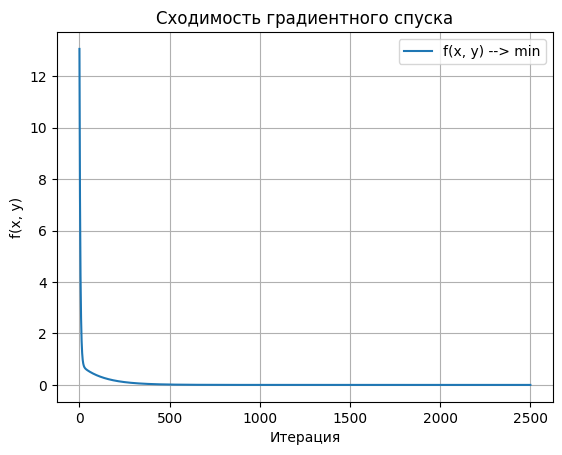

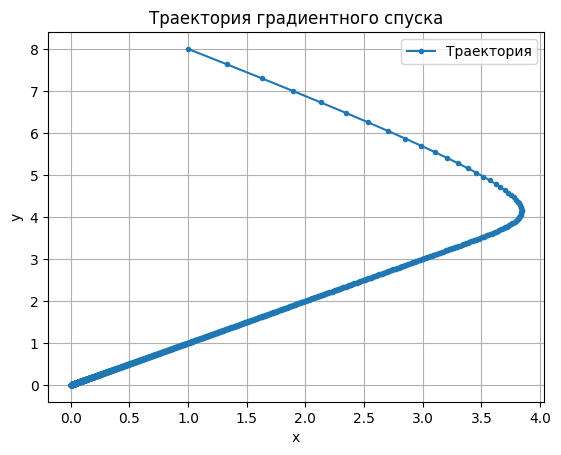

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:892: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



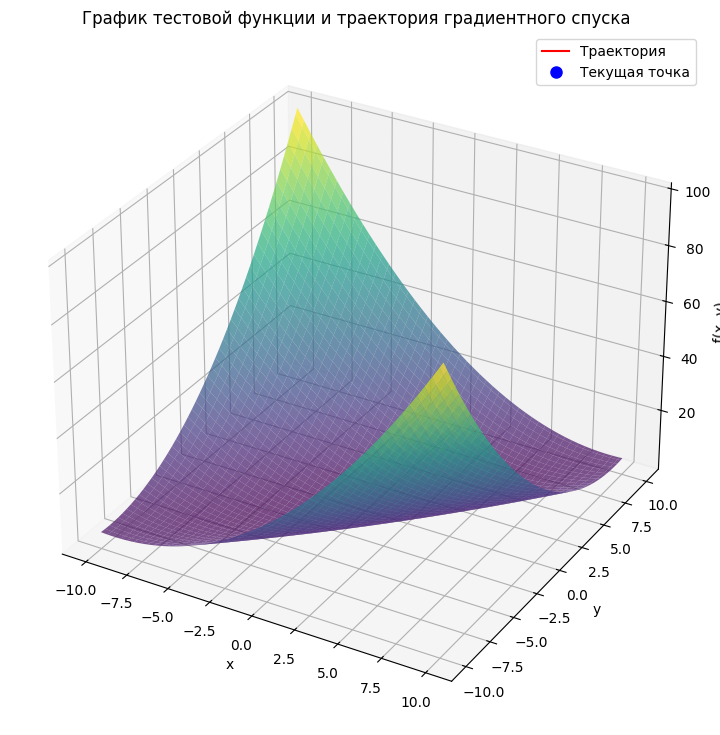

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Функция Матьяса
def f(x, y):
    return 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y

def gradient(x, y):
    df_dx = 0.52 * x - 0.48 * y # частная производная по x
    df_dy = 0.52 * y - 0.48 * x # по y
    #df_dx = 10 * x + 8 * y - 34
    #df_dy = 10 * y + 8 * x - 38
    return df_dx, df_dy

# Функция Бута
#def f(x, y):
#    return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

# def gradient(x, y):
#     df_dx = 10 * x + 8 * y - 34
#     df_dy = 10 * y + 8 * x - 38
#     return df_dx, df_dy

def gradient_descent(start_x, start_y, learning_rate=0.1, iter=2500):
    x = start_x
    y = start_y
    history = [(x, y, f(x, y))]

    for i in range(iter):
        df_dx, df_dy = gradient(x, y)

        x = x - learning_rate * df_dx
        y = y - learning_rate * df_dy

        history.append((x, y, f(x, y)))

    return x, y, history

start_x = 1
start_y = 8
learning_rate = 0.1
iters = 2500

x_opt, y_opt, history = gradient_descent(start_x, start_y, learning_rate, iters)

# Вычисление погрешности
inaccuracy = np.sqrt((x_opt - 0) ** 2 + (y_opt - 0) ** 2)

print(f"Точка оптимума: x = {x_opt:.5f}, y = {y_opt:.5f}")
print(f"Минимум функции: f_min(x, y) = {f(x_opt, y_opt):.5f}")
print(f"Погрешность относительно аналитической точки оптимума: {inaccuracy:.5f}")

x_vals = [point[0] for point in history]
y_vals = [point[1] for point in history]
func_vals = [point[2] for point in history]

# Построение графика зависимости значения функции при приближении к точке оптимума
fig, ax = plt.subplots()
ax.plot(range(len(func_vals)), func_vals, label='f(x, y) --> min')
ax.set_xlabel('Итерация')
ax.set_ylabel('f(x, y)')
ax.set_title('Сходимость градиентного спуска')
plt.grid(True)
plt.legend()
plt.show()

# Визуализация траектории на плоскости (x, y)
plt.plot(x_vals, y_vals, 'o-', label='Траектория', markersize=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Траектория градиентного спуска')
plt.grid(True)
plt.legend()
plt.show()

# Отображение графика тестовой функции и точки минимума с анимацией
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
func_mesh = f(x_mesh, y_mesh)

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, func_mesh, cmap='viridis', alpha=0.7)

trajectory, = ax.plot([], [], [], 'r-', label='Траектория')
point, = ax.plot([], [], [], 'bo', markersize=8, label='Текущая точка')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('График тестовой функции и траектория градиентного спуска')
plt.legend()

def update(num):
    trajectory.set_data(x_vals[:num], y_vals[:num])
    trajectory.set_3d_properties(func_vals[:num])
    point.set_data([x_vals[num - 1]], [y_vals[num - 1]])
    point.set_3d_properties([func_vals[num - 1]])


ani = FuncAnimation(fig, update, frames=len(x_vals), interval=100, repeat=False)
plt.show()

# Задание 2

In [11]:
!pip install pygmo

In [12]:
import pygmo as pg
import numpy as np

# Функция Матьяса
def test_func_1(x):
    return 0.26 * (x[0] ** 2 + x[1] ** 2) - 0.48 * x[0] * x[1]

# Функция Розенброка
def test_func_2(x):
    return sum(100 * (x[i + 1] - x[i] ** 2) ** 2 + (x[i] - 1) ** 2 for i in range(len(x) - 1))

# Класс задачи для оптимизации
class Problem:
    def __init__(self, func, dim, bounds):
        self.func = func # Для выбора тестовой функции
        self.dim = dim # Для установки размерности функции
        self.bounds = bounds # Для установки допустимых границ значений функции

    def fitness(self, x):
        return [self.func(x)]

    def get_bounds(self):
        return self.bounds

# Настройка задачи для оптимизации
test_func_1_problem = pg.problem(Problem(test_func_1, 2, ([-10] * 2, [10] * 2)))
test_func_2_problem = pg.problem(Problem(test_func_2, 2, ([-2] * 2, [2] * 2)))

""" Выбор трех алгоритмов глобальной оптимизации, пользователь может выбирать любые из библиотеки """
algorithms = {
    "Differential Evolution": pg.algorithm(pg.de(gen=100)),
    "Particle Swarm Optimization": pg.algorithm(pg.pso(gen=100)),
    "Grey Wolf Optimizer": pg.algorithm(pg.gwo(gen=100))
}

# Функция для выполнения оптимизации
def optimize(problem, algorithms):
    results = {}
    for name, algo in algorithms.items():
        algo.set_verbosity(False)
        pop = pg.population(problem, size=20)  # Создание начальной популяции
        pop = algo.evolve(pop)  # Выполнение оптимизации
        results[name] = (pop.champion_x, pop.champion_f[0])  # Лучшее решение для точки оптимума и значение функции
    return results

test_func_1_results = optimize(test_func_1_problem, algorithms)

test_func_2_results = optimize(test_func_2_problem, algorithms)

def print_results(problem_name, results):
    print(f"\nРезультаты для тестовой функции {problem_name}:")
    print(f"{'Алгоритм':<30} | {'Точка оптимума':<30} | {'Минимум функции':<15}")
    print("-" * 90)
    for algo, (x, f) in results.items():
        print(f"{algo:<30} | {np.array_str(np.array(x), precision=5):<30} | {f:<15.5f}")

print_results("Матьяса", test_func_1_results)
print_results("Розенброка", test_func_2_results)



Результаты для тестовой функции Матьяса:
Алгоритм                       | Точка оптимума                 | Минимум функции
------------------------------------------------------------------------------------------
Differential Evolution         | [0.00064 0.00068]              | 0.00000        
Particle Swarm Optimization    | [0.00074 0.00079]              | 0.00000        
Grey Wolf Optimizer            | [-4.0363e-19 -3.9657e-19]      | 0.00000        

Результаты для тестовой функции Розенброка:
Алгоритм                       | Точка оптимума                 | Минимум функции
------------------------------------------------------------------------------------------
Differential Evolution         | [1.00018 1.00037]              | 0.00000        
Particle Swarm Optimization    | [1.02285 1.04578]              | 0.00054        
Grey Wolf Optimizer            | [1.00004 1.00011]              | 0.00000        


# Задание 3

In [13]:
!pip install optuna

In [14]:
import optuna
from optuna.samplers import TPESampler, RandomSampler
from optuna.pruners import MedianPruner, HyperbandPruner
from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
    plot_slice,
    plot_parallel_coordinate,
)
from sklearn.datasets import load_breast_cancer, load_diabetes # датасеты
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor # классы алгоритмов классификации и регрессии
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


storage = "sqlite:///lroptuna.db"


""" Классификация """
def objective_classification(trial):
    data = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(
        data.data, data.target, test_size=0.25, random_state=42
    )

    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.25, log=True)
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)

    clf = GradientBoostingClassifier(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)


""" Регрессия """
def objective_regression(trial):
    data = load_diabetes()
    X_train, X_test, y_train, y_test = train_test_split(
        data.data, data.target, test_size=0.25, random_state=42
    )

    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.25, log=True)
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)

    reg = GradientBoostingRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)
    return mean_squared_error(y_test, y_pred)


""" Оптимизация гиперпараметров классификации """
for sampler in [TPESampler(), RandomSampler()]:
    if isinstance(sampler, RandomSampler):
        pruner = MedianPruner()
    elif isinstance(sampler, TPESampler):
        pruner = HyperbandPruner()
    study_name = f"classification_{sampler.__class__.__name__}_{pruner.__class__.__name__}"
    study = optuna.create_study(
        study_name=study_name,
        storage=storage,
        sampler=sampler,
        pruner=pruner,
        direction="maximize",
        load_if_exists=True
    )
    study.optimize(objective_classification, n_trials=10)

    print(f"Study {study_name} best params: {study.best_params}")
    print(f"Study {study_name} best value: {study.best_value}")

    plot_optimization_history(study).show()
    plot_param_importances(study).show()


""" Оптимизация гиперпараметров регрессии """
for sampler in [TPESampler(), RandomSampler()]:
    if isinstance(sampler, RandomSampler):
        pruner = MedianPruner()
    elif isinstance(sampler, TPESampler):
        pruner = HyperbandPruner()
    study_name = f"regression_{sampler.__class__.__name__}_{pruner.__class__.__name__}"
    study = optuna.create_study(
        study_name=study_name,
        storage=storage,
        sampler=sampler,
        pruner=pruner,
        direction="minimize",
        load_if_exists=True
    )
    study.optimize(objective_regression, n_trials=10)

    print(f"Study {study_name} best params: {study.best_params}")
    print(f"Study {study_name} best value: {study.best_value}")

    plot_optimization_history(study).show()
    plot_param_importances(study).show()


[I 2024-12-22 23:08:55,669] Using an existing study with name 'classification_TPESampler_HyperbandPruner' instead of creating a new one.
[I 2024-12-22 23:08:57,963] Trial 10 finished with value: 0.958041958041958 and parameters: {'learning_rate': 0.24455132489146017, 'n_estimators': 74, 'max_depth': 8, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.958041958041958.
[I 2024-12-22 23:09:04,491] Trial 11 finished with value: 0.958041958041958 and parameters: {'learning_rate': 0.2392838323155538, 'n_estimators': 413, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.958041958041958.
[I 2024-12-22 23:09:16,629] Trial 12 finished with value: 0.965034965034965 and parameters: {'learning_rate': 0.03915098975784692, 'n_estimators': 287, 'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 5}. Best is trial 12 with value: 0.965034965034965.
[I 2024-12-22 23:09:31,117] Trial 13 finished with value: 0.95804195804

Study classification_TPESampler_HyperbandPruner best params: {'learning_rate': 0.03915098975784692, 'n_estimators': 287, 'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 5}
Study classification_TPESampler_HyperbandPruner best value: 0.965034965034965


[I 2024-12-22 23:09:56,317] Using an existing study with name 'classification_RandomSampler_MedianPruner' instead of creating a new one.
[I 2024-12-22 23:10:03,274] Trial 10 finished with value: 0.958041958041958 and parameters: {'learning_rate': 0.016551811314213828, 'n_estimators': 477, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 13}. Best is trial 6 with value: 0.965034965034965.
[I 2024-12-22 23:10:05,591] Trial 11 finished with value: 0.951048951048951 and parameters: {'learning_rate': 0.014606809056123129, 'n_estimators': 178, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 17}. Best is trial 6 with value: 0.965034965034965.
[I 2024-12-22 23:10:15,808] Trial 12 finished with value: 0.958041958041958 and parameters: {'learning_rate': 0.03322271308425883, 'n_estimators': 452, 'max_depth': 17, 'min_samples_split': 15, 'min_samples_leaf': 6}. Best is trial 6 with value: 0.965034965034965.
[I 2024-12-22 23:10:16,860] Trial 13 finished with value: 0.965034

Study classification_RandomSampler_MedianPruner best params: {'learning_rate': 0.12119407344782886, 'n_estimators': 217, 'max_depth': 12, 'min_samples_split': 14, 'min_samples_leaf': 9}
Study classification_RandomSampler_MedianPruner best value: 0.965034965034965


[I 2024-12-22 23:10:34,584] Using an existing study with name 'regression_TPESampler_HyperbandPruner' instead of creating a new one.
[I 2024-12-22 23:10:36,066] Trial 10 finished with value: 3576.76808727529 and parameters: {'learning_rate': 0.04096701408487824, 'n_estimators': 399, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 6}. Best is trial 1 with value: 2996.9977189439714.
[I 2024-12-22 23:10:36,581] Trial 11 finished with value: 2932.4280641114556 and parameters: {'learning_rate': 0.010031444984696243, 'n_estimators': 262, 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 17}. Best is trial 11 with value: 2932.4280641114556.
[I 2024-12-22 23:10:37,106] Trial 12 finished with value: 2911.3023178941075 and parameters: {'learning_rate': 0.010567555328806365, 'n_estimators': 263, 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 20}. Best is trial 12 with value: 2911.3023178941075.
[I 2024-12-22 23:10:37,708] Trial 13 finished with value: 3069.1

Study regression_TPESampler_HyperbandPruner best params: {'learning_rate': 0.010462429183684964, 'n_estimators': 380, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 17}
Study regression_TPESampler_HyperbandPruner best value: 2850.5675734597576


[I 2024-12-22 23:10:44,786] Using an existing study with name 'regression_RandomSampler_MedianPruner' instead of creating a new one.
[I 2024-12-22 23:10:45,326] Trial 10 finished with value: 3488.477679541987 and parameters: {'learning_rate': 0.0789024665475958, 'n_estimators': 173, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 14}. Best is trial 6 with value: 2953.6847495154484.
[I 2024-12-22 23:10:46,195] Trial 11 finished with value: 3725.4764177622783 and parameters: {'learning_rate': 0.09516510414527755, 'n_estimators': 373, 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 16}. Best is trial 6 with value: 2953.6847495154484.
[I 2024-12-22 23:10:46,983] Trial 12 finished with value: 3153.2608848957198 and parameters: {'learning_rate': 0.02311277237946076, 'n_estimators': 450, 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 6 with value: 2953.6847495154484.
[I 2024-12-22 23:10:47,707] Trial 13 finished with value: 3190.661183

Study regression_RandomSampler_MedianPruner best params: {'learning_rate': 0.02208181264748126, 'n_estimators': 119, 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 3}
Study regression_RandomSampler_MedianPruner best value: 2953.6847495154484


#Задание 4 и 5

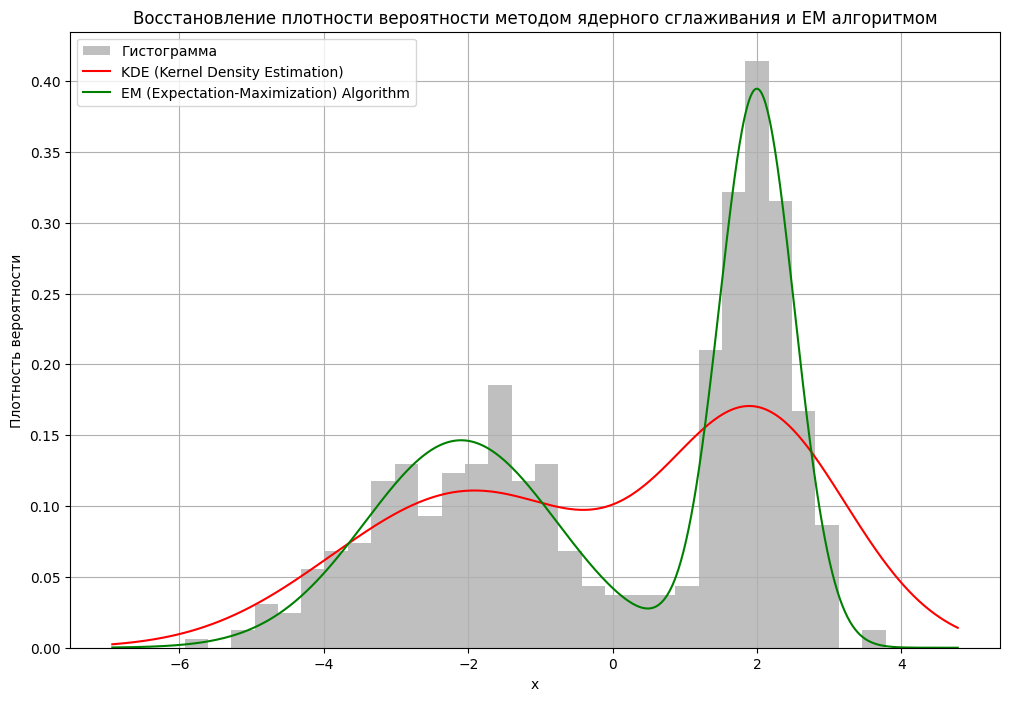

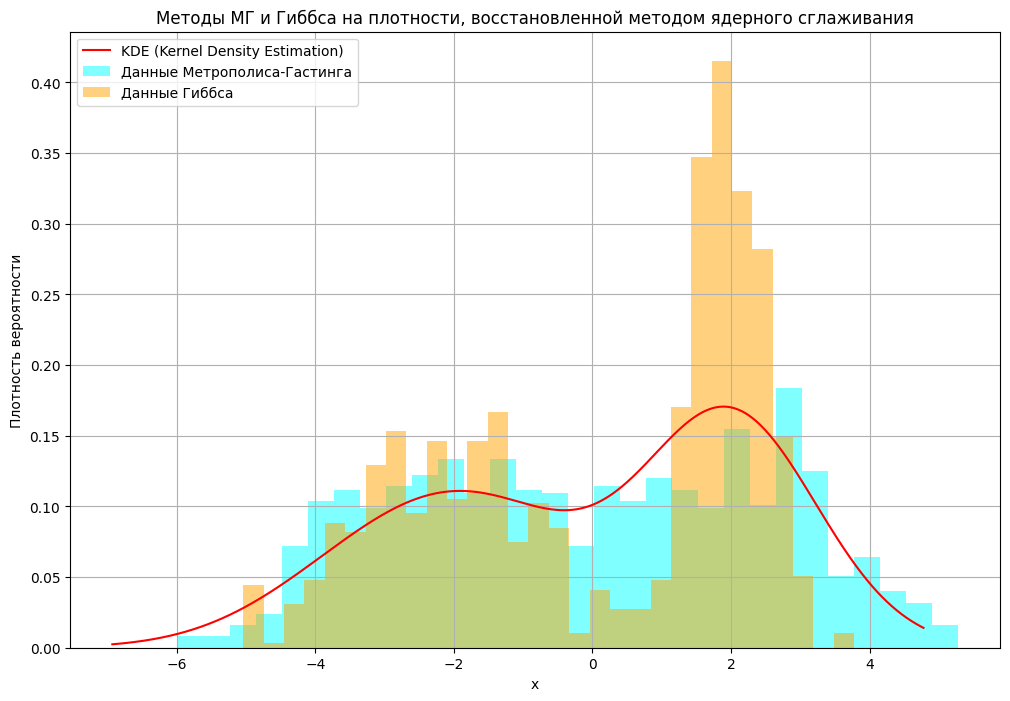

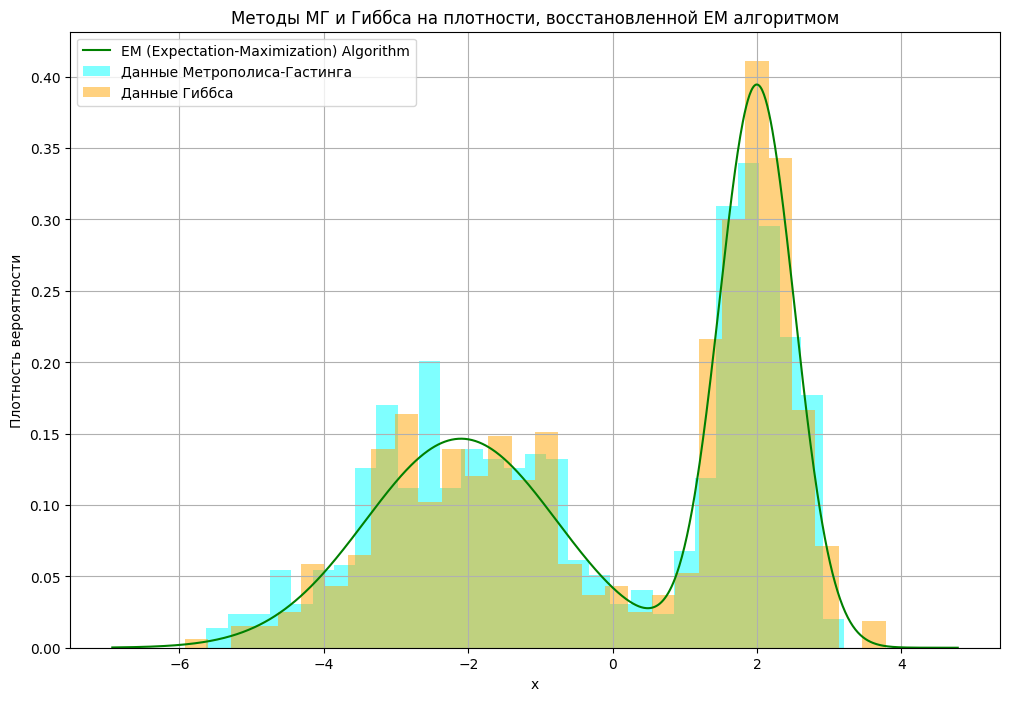

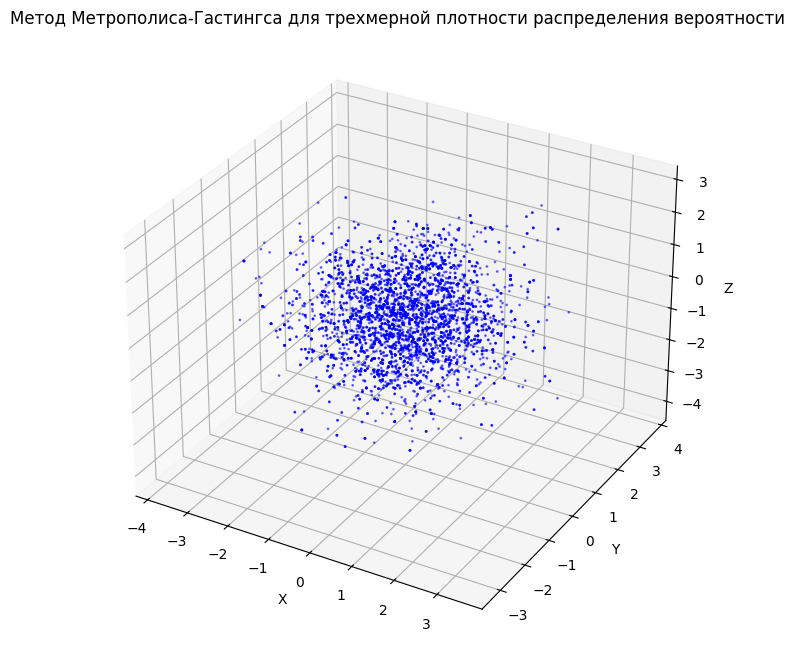

KL-дивергенция (исходный -> сгенерированный): 0.03590
KL-дивергенция (сгенерированный -> исходный): 0.04021


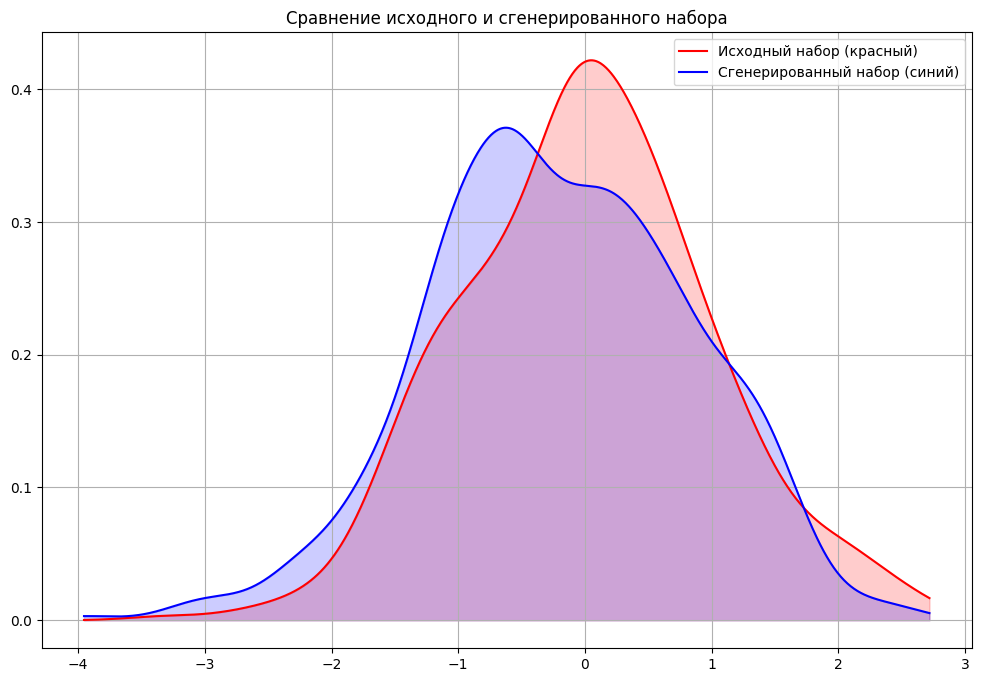

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture


""" Генерация данных для выборки и данных для восстановления плотности распределения вероятности """
np.random.seed(42)
data = np.concatenate([
    np.random.normal(loc=-2, scale=1.5, size=250),
    np.random.normal(loc=2, scale=0.5, size=250)
])

x_distribution = np.linspace(*(data.min() - 1, data.max() + 1), 1000)


""" Реализация метода ядерного сглаживания """
def kernel_density_estimation(data, bandwidth):
    kde = gaussian_kde(data, bw_method=bandwidth)
    return kde

kde = kernel_density_estimation(data, bandwidth=0.5)
y_kde = kde(x_distribution)


""" Реализация ЕМ алгоритма """
x_distribution = np.linspace(*(data.min() - 1, data.max() + 1), 1000)[:, None] # преобразуем в двумерный массив

def em_density_estimation(data, n_components=2):
    data = data[:, None] # преобразуем в двумерный массив
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(data)
    return gmm

gmm = em_density_estimation(data, n_components=2)
log_density = gmm.score_samples(x_distribution)
y_gmm = np.exp(log_density)


plt.figure(figsize=(12, 8))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Гистограмма', color='grey')
plt.plot(x_distribution, y_kde, label='KDE (Kernel Density Estimation)', color='red')
plt.plot(x_distribution, y_gmm, label='EM (Expectation-Maximization) Algorithm', color='green')
plt.grid(True)
plt.legend()
plt.title('Восстановление плотности вероятности методом ядерного сглаживания и ЕМ алгоритмом')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.show()


n_samples = 1000


""" Реализация метода Метрополиса-Гастингса """
def metropolis_hastings(target_density, init_x, n_samples, proposal_std):
    samples = [init_x]
    current = init_x
    for _ in range(n_samples - 1):
        proposal = np.random.normal(current, proposal_std)
        acceptance_ratio = target_density(proposal) / target_density(current)
        if np.random.rand() < acceptance_ratio:
            current = proposal
        samples.append(current)
    return np.array(samples)


""" Реализация метода Гиббса """
def gibbs_sampling(init_x_y, conditional_distributions, n_samples):
    samples = [init_x_y]
    current = np.array(init_x_y)
    for _ in range(n_samples - 1):
        for i, conditional in enumerate(conditional_distributions):
            current[i] = conditional(*current[:i], *current[i + 1:])
        samples.append(current.copy())
    return np.array(samples)


""" Применение методов МГ и Гиббса к плотности, восстановленной KDE """
target_density = kde.evaluate

mh_samples = metropolis_hastings(target_density, data.mean(), n_samples, proposal_std=1.0)
gibbs_samples = gibbs_sampling(
    [data.mean()],
    [lambda: np.random.choice(data)],
    n_samples
)

plt.figure(figsize=(12, 8))
plt.plot(x_distribution, y_kde, label='KDE (Kernel Density Estimation)', color='red')
plt.hist(mh_samples, bins=30, density=True, alpha=0.5, label='Данные Метрополиса-Гастинга', color='cyan')
plt.hist(gibbs_samples, bins=30, density=True, alpha=0.5, label='Данные Гиббса', color='orange')
plt.title('Методы МГ и Гиббса на плотности, восстановленной методом ядерного сглаживания')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.show()


""" Применение методов МГ и Гиббса к плотности, восстановленной EM алгоритмом """
def target_density(x):
    return np.exp(gmm.score_samples(np.array([[x]])))

mh_samples = metropolis_hastings(target_density, data.mean(), n_samples, proposal_std=1.0)
gibbs_samples = gibbs_sampling(
    [data.mean()],
    [lambda: np.random.choice(data)],
    n_samples
)

plt.figure(figsize=(12, 8))
plt.plot(x_distribution, y_gmm, label='EM (Expectation-Maximization) Algorithm', color='green')
plt.hist(mh_samples, bins=30, density=True, alpha=0.5, label='Данные Метрополиса-Гастинга', color='cyan')
plt.hist(gibbs_samples, bins=30, density=True, alpha=0.5, label='Данные Гиббса', color='orange')
plt.title('Методы МГ и Гиббса на плотности, восстановленной ЕМ алгоритмом')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.show()


""" Реализация блуждания в случае трехмерной функции плотности в методе МГ """
def target_density_3d(x, y, z):
    return np.exp(-0.5 * (x ** 2 + y ** 2 + z ** 2)) # mu = 0, sigma = 1


""" Метод МГ для трехмерного набора точек """
def metropolis_hastings_3d(target_density, init_point, n_samples, proposal_std):
    samples = [init_point]
    current = np.array(init_point)
    for _ in range(n_samples - 1):
        proposal = current + np.random.normal(0, proposal_std, size=3)
        acceptance_ratio = target_density(*proposal) / target_density(*current)
        if np.random.rand() < acceptance_ratio:
            current = proposal
        samples.append(current.copy())
    return np.array(samples)

n_samples_3d = 5000
init_point_3d = [0, 0, 0]
proposal_std_3d = 1.0

samples_3d = metropolis_hastings_3d(target_density_3d, init_point_3d, n_samples_3d, proposal_std_3d)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples_3d[:, 0], samples_3d[:, 1], samples_3d[:, 2], c='blue', alpha=0.5, s=1)
ax.set_title('Метод Метрополиса-Гастингса для трехмерной плотности распределения вероятности')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


""" Сравнение красного и синего набора точек (исходного и сгенерированного) """
red_dots = np.random.normal(loc=0, scale=1.0, size=500)

def target_density_1d(x):
    return np.exp(-0.5 * x ** 2)

blue_dots = metropolis_hastings(target_density_1d, init_x=0, n_samples=1000, proposal_std=1.0)

red_kde = gaussian_kde(red_dots)
blue_kde = gaussian_kde(blue_dots)


def kl_divergence(p, q, grid):
    p_vals = p(grid)
    q_vals = q(grid)
    return np.sum(p_vals * np.log(p_vals / q_vals)) * (grid[1] - grid[0])


grid = np.linspace(min(red_dots.min(), blue_dots.min()), max(red_dots.max(), blue_dots.max()), 1000)


kl_red_to_blue = kl_divergence(red_kde, blue_kde, grid)
kl_blue_to_red = kl_divergence(blue_kde, red_kde, grid)


print(f"KL-дивергенция (исходный -> сгенерированный): {kl_red_to_blue:.5f}")
print(f"KL-дивергенция (сгенерированный -> исходный): {kl_blue_to_red:.5f}")


plt.figure(figsize=(12, 8))
plt.plot(grid, red_kde(grid), label='Исходный набор (красный)', color='red')
plt.plot(grid, blue_kde(grid), label='Сгенерированный набор (синий)', color='blue')
plt.fill_between(grid, 0, red_kde(grid), color='red', alpha=0.2)
plt.fill_between(grid, 0, blue_kde(grid), color='blue', alpha=0.2)
plt.title('Сравнение исходного и сгенерированного набора')
plt.grid(True)
plt.legend()
plt.show()






